This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data. These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook. You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

### Question 1
Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

Correlation Matrix of the systolic and diastolic blood pressure measurements
          BPXSY1    BPXSY2    BPXDI1    BPXDI2
BPXSY1  1.000000  0.962287  0.316531  0.277681
BPXSY2  0.962287  1.000000  0.329843  0.303847
BPXDI1  0.316531  0.329843  1.000000  0.884722
BPXDI2  0.277681  0.303847  0.884722  1.000000


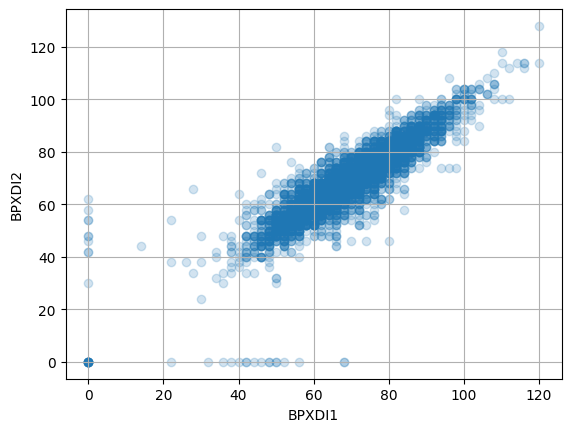

In [13]:
plt.grid(True)
sns.regplot(x='BPXDI1', y='BPXDI2', data=da, fit_reg=False, scatter_kws={'alpha':0.2})
r = da[['BPXSY1','BPXSY2','BPXDI1','BPXDI2']].corr()
print('Correlation Matrix of the systolic and diastolic blood pressure measurements')
print(r)

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure compare to the correlation between repeated measurements of systolic blood pressure?

__Answer:__
The correlation between repeated measurements of systolic blood pressure is 0.96 which is very high which means measurements of systolic blood pressure seemms to be consistent across both readings. The correlation between repeated diastolic blood pressure is 0.88 which may not be as high of that between the repeated systolic blood pressure measurements but is still quite very high and tells us that measurements of repeated diastolic blood pressures also seem quite consistent but the measurements of the systolic blood pressure is more consistent because it has a slightly higher correlation

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

__Answer:__ 
From the correlation matrix, the correlation between the second systolic and second diastolic blood pressure measurements is 0.30, while the correlation between the first systolic and first diastolic blood pressure measure is 0.32. This means the first systolic and first diastolic blood pressure measures are very slightly more correlated

#### Question 2
Calculate the correlation coefficient between the first measures of diastolic and systolic blood pressure within each subgroup defined by sex and ethnicity. Then construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement stratified by sex (rows) and race/ethnicity groups (columns)

Correlation Matrix of the first systolic and diastolic blood pressure measures for different genders of different enthicities
                             BPXDI1    BPXSY1
RIAGENDRx RIDRETH1                           
Female    1        BPXDI1  1.000000  0.351912
                   BPXSY1  0.351912  1.000000
          2        BPXDI1  1.000000  0.239737
                   BPXSY1  0.239737  1.000000
          3        BPXDI1  1.000000  0.241947
                   BPXSY1  0.241947  1.000000
          4        BPXDI1  1.000000  0.378335
                   BPXSY1  0.378335  1.000000
          5        BPXDI1  1.000000  0.438976
                   BPXSY1  0.438976  1.000000
Male      1        BPXDI1  1.000000  0.302742
                   BPXSY1  0.302742  1.000000
          2        BPXDI1  1.000000  0.306427
                   BPXSY1  0.306427  1.000000
          3        BPXDI1  1.000000  0.207470
                   BPXSY1  0.207470  1.000000
          4        BPXDI1  1.000000  0.423597


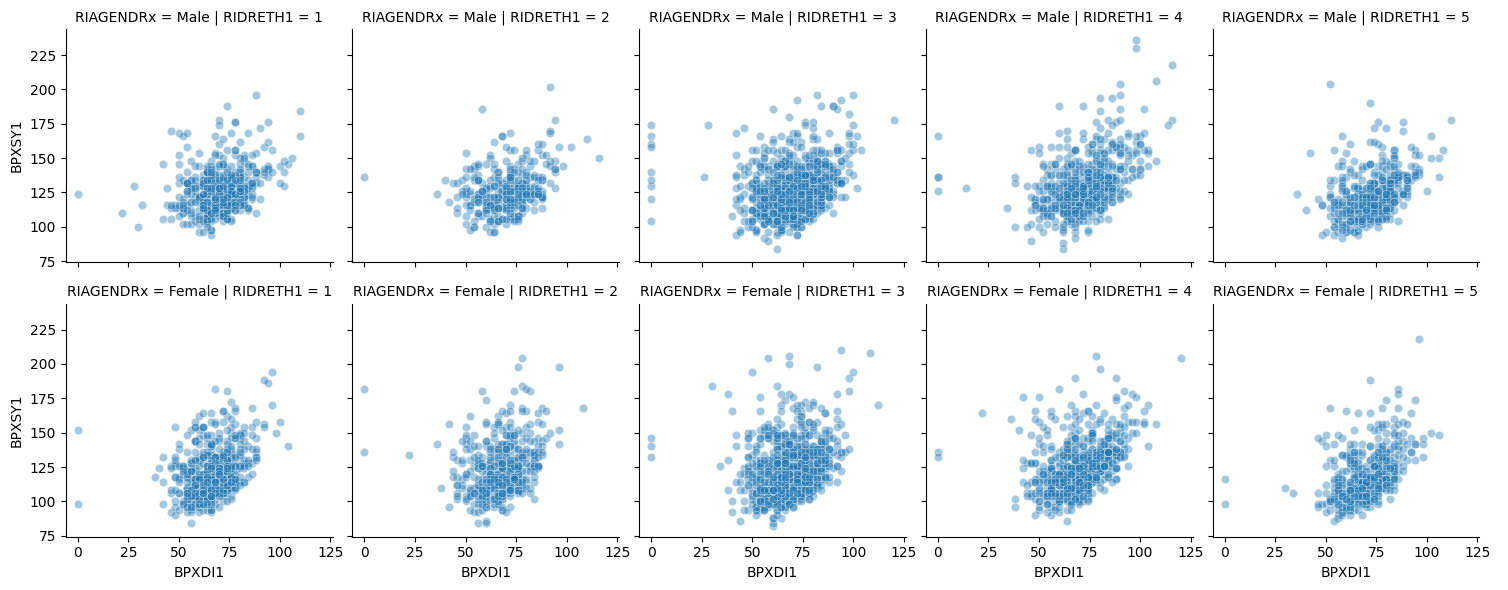

In [22]:
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male',2:'Female'})
db = da.groupby(['RIAGENDRx','RIDRETH1'])[['BPXDI1','BPXSY1']].corr()
print('Correlation Matrix of the first systolic and diastolic blood pressure measures for different genders of different enthicities')
print(db)
sns.FacetGrid(data=da, col='RIDRETH1', row='RIAGENDRx').map(sns.scatterplot,'BPXDI1','BPXSY1',alpha=0.4).add_legend()

__Q2a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

__Answer:__
The correlation between diastolic and systolic blood pressure varies to different degrees within each demographic subgroup. For both males and females, the correlation is not consistently strong across all groups, indicating that the strength of the relationship between these two blood pressure variables is influenced by other factors (such as age, health conditions, or lifestyle factors) within these subgroups.

#### Question 3
Use "violin plots" to compare the distributions of ages within groups defined by sex and educational attainment.

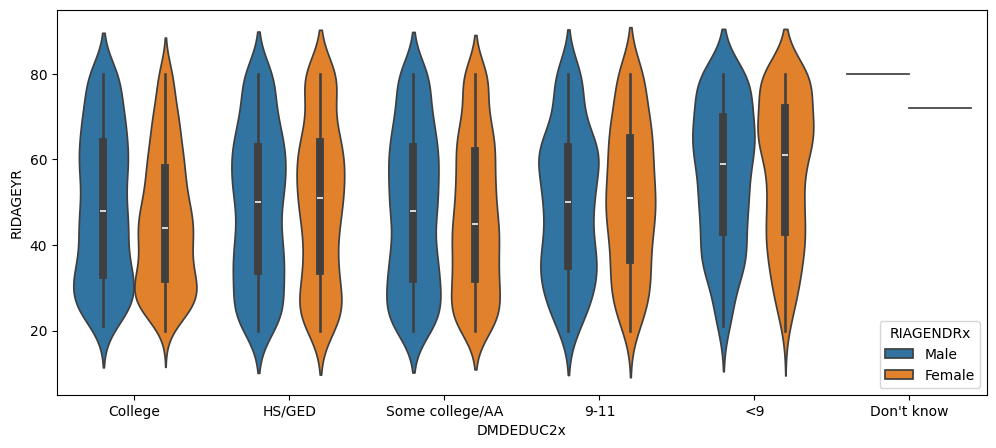

In [26]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
plt.figure(figsize=(12,5))
dc = sns.violinplot(x=da['DMDEDUC2x'], y=da['RIDAGEYR'], hue=da['RIAGENDRx'])

__Q3a.__ Comment on any evident differences among the age distributions in the different demographic groups.



__Answer:__
More people between the age of 20 and 60 have college compared to those between 60 and 80. More men have college than ladies. More people between the ages of 60 to 80 have <9 compared to people in their 20s to 40s  

#### Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

<Axes: xlabel='AgeBands', ylabel='BMXBMI'>

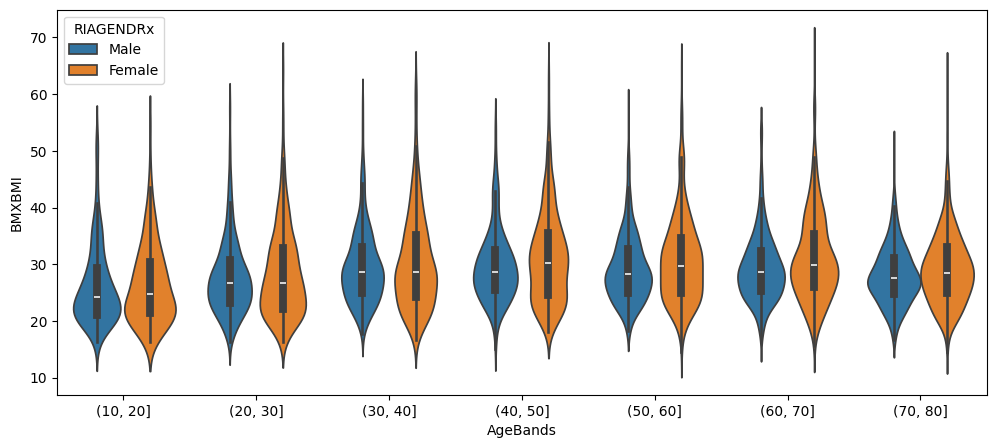

In [31]:
da['AgeBands'] = pd.cut(da['RIDAGEYR'],bins=[10,20,30,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.violinplot(x=da['AgeBands'], y=da['BMXBMI'],hue=da['RIAGENDRx'])

__Q4a.__ Comment on the differences in BMI across the demographic groups.

__Answer:__
BMI is right-skewed in all strata, and is slightly higher in age ranges 40-50 and 50-60. The BMI distributions for females (RIAGENDR=2) are more dispersed than the BMI distributions for males (RIAGENDR=1).

#### Question 5
Construct a frequency table for the joint distribution of ethnicity groups (RIDRETH1) and health-insurance status (HIQ210). Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [33]:
x = pd.crosstab(da['RIDRETH1'],da['HIQ210']).apply(lambda x: x/x.sum(), axis=1)
x

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

__Answer:__ 
Group 1 (Mexican American) has the highest rate of having no insurance in the last year.